# Computational tools for data science - project

Laoading data and first exploratory analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# netflix = pd.read_csv('data/netflix.csv')
# amazon = pd.read_csv('data/amazon.csv')
# hulu = pd.read_csv('data/hulu.csv')
# apple = pd.read_csv('data/apple.csv')
# hbo = pd.read_csv('data/hbo.csv')

# main = pd.read_csv('data/TMDB_all_movies.csv')

In [ ]:
# main.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,budget,imdb_id,...,spoken_languages,cast,director,director_of_photography,writers,producers,music_composer,imdb_rating,imdb_votes,poster_path
0,2,Ariel,7.1,330.0,Released,1988-10-21,0.0,73.0,0.0,tt0094675,...,suomi,"Tomi Salmela, Jaakko Talaskivi, Hannu Kivisalo...",Aki Kaurismäki,Timo Salminen,Aki Kaurismäki,Aki Kaurismäki,NaN,7.4,8735.0,/ojDg0PGvs6R9xYFodRct2kdI6wC.jpg
1,3,Shadows in Paradise,7.3,369.0,Released,1986-10-17,0.0,74.0,0.0,tt0092149,...,"suomi, English, svenska","Kati Outinen, Ulla Kuosmanen, Jaakko Talaskivi...",Aki Kaurismäki,Timo Salminen,Aki Kaurismäki,Mika Kaurismäki,NaN,7.5,7484.0,/nj01hspawPof0mJmlgfjuLyJuRN.jpg
2,5,Four Rooms,5.8,2623.0,Released,1995-12-09,4257354.0,98.0,4000000.0,tt0113101,...,English,"Quentin Tarantino, Jennifer Beals, Antonio Ban...","Alexandre Rockwell, Quentin Tarantino, Allison...","Rodrigo García, Guillermo Navarro, Phil Parmet...","Alexandre Rockwell, Quentin Tarantino, Allison...","Alexandre Rockwell, Quentin Tarantino, Lawrenc...",Combustible Edison,6.7,112484.0,/75aHn1NOYXh4M7L5shoeQ6NGykP.jpg
3,6,Judgment Night,6.5,331.0,Released,1993-10-15,12136938.0,109.0,21000000.0,tt0107286,...,English,"Christine Harnos, Lauren Robinson, Deirdre Kel...",Stephen Hopkins,Peter Levy,"Lewis Colick, Jere Cunningham","Lloyd Segan, Gene Levy, Marilyn Vance",Alan Silvestri,6.6,19268.0,/3rvvpS9YPM5HB2f4HYiNiJVtdam.jpg
4,8,Life in Loops (A Megacities RMX),7.5,27.0,Released,2006-01-01,0.0,80.0,42000.0,tt0825671,...,"English, हिन्दी, 日本語, Pусский, Español",NaN,Timo Novotny,Wolfgang Thaler,"Michael Glawogger, Timo Novotny","Ulrich Gehmacher, Timo Novotny",NaN,8.2,284.0,/7ln81BRnPR2wqxuITZxEciCe1lc.jpg


In [ ]:
netflix.head()

,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries
0,Forrest Gump,movie,"Drama, Romance",1994.0,tt0109830,8.8,2315661.0,MX
1,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997.0,tt0119116,7.6,516953.0,"AT, CH, DE"
2,Kill Bill: Vol. 1,movie,"Action, Crime, Thriller",2003.0,tt0266697,8.2,1221506.0,"AE, AL, AO, AT, AU, AZ, BG, BH, BY, CA, CI, CM..."
3,Jarhead,movie,"Biography, Drama, War",2005.0,tt0418763,7.0,211503.0,"AD, AE, AG, AL, AO, AR, AT, AZ, BA, BB, BG, BH..."
4,Unforgiven,movie,"Drama, Western",1992.0,tt0105695,8.2,443687.0,"AU, BA, BG, CZ, HR, HU, MD, ME, MK, NZ, PL, RO..."


In [ ]:
# Remove TV shows (we only want movies)
def remove_tv_show(df):
    return df[df['type'] == 'movie']

print('Before removing shows')
print(netflix.shape)
print(amazon.shape)
print(hulu.shape)
print(apple.shape)
print(hbo.shape)

netflix = remove_tv_show(netflix)
apple = remove_tv_show(apple)
hulu = remove_tv_show(hulu)
amazon = remove_tv_show(amazon)
hbo = remove_tv_show(hbo)

#dimension of the dataset
print('After removing shows')
print(netflix.shape)
print(amazon.shape)
print(hulu.shape)
print(apple.shape)
print(hbo.shape)

Before removing shows
(20106, 8)
(66905, 8)
(9753, 8)
(17648, 8)
(7017, 8)
After removing shows
(15499, 8)
(58559, 8)
(5915, 8)
(13598, 8)
(3653, 8)


In [ ]:
#add platform column to main dataset
def platform_column(main, platform, platform_name):
    for index, row in main.iterrows():
        if row['title'] in platform['title'].values: 
            main.loc[index, platform_name] = 1
        else:
            main.loc[index, platform_name] = 0
    return main

In [ ]:
#main_netflix = platform_column(main, netflix, 'Netflix')
#main_net_ama = platform_column(main_netflix, amazon, 'Amazon')
#main_net_ama_hulu = platform_column(main_net_ama, hulu, 'Hulu')
#main_net_ama_hulu_apple = platform_column(main_net_ama_hulu, apple, 'Apple')
#main_complete = platform_column(main_net_ama_hulu_apple, hbo, 'HBO')


### Sentiment score column

With the goal of calculating the similarity between movies, we decided to add the sentiment of the overview as a factor. To do so, we first need to calculate it and add it to the dataset.

In [8]:
import string
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [ ]:
#main_complete = pd.read_csv('data/main_complete.csv')
#main_complete.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,budget,imdb_id,...,music_composer,imdb_rating,imdb_votes,poster_path,Netflix,Amazon,Hulu,Apple,HBO,sentiment
0,2,Ariel,7.1,330.0,Released,1988-10-21,0.0,73.0,0.0,tt0094675,...,NaN,7.4,8735.0,/ojDg0PGvs6R9xYFodRct2kdI6wC.jpg,0.0,1.0,1.0,0.0,0.0,68.24
1,3,Shadows in Paradise,7.3,369.0,Released,1986-10-17,0.0,74.0,0.0,tt0092149,...,NaN,7.5,7484.0,/nj01hspawPof0mJmlgfjuLyJuRN.jpg,0.0,1.0,1.0,0.0,0.0,73.44
2,5,Four Rooms,5.8,2623.0,Released,1995-12-09,4257354.0,98.0,4000000.0,tt0113101,...,Combustible Edison,6.7,112484.0,/75aHn1NOYXh4M7L5shoeQ6NGykP.jpg,0.0,1.0,0.0,1.0,0.0,86.06
3,6,Judgment Night,6.5,331.0,Released,1993-10-15,12136938.0,109.0,21000000.0,tt0107286,...,Alan Silvestri,6.6,19268.0,/3rvvpS9YPM5HB2f4HYiNiJVtdam.jpg,0.0,1.0,0.0,0.0,0.0,79.34
4,8,Life in Loops (A Megacities RMX),7.5,27.0,Released,2006-01-01,0.0,80.0,42000.0,tt0825671,...,NaN,8.2,284.0,/7ln81BRnPR2wqxuITZxEciCe1lc.jpg,0.0,0.0,0.0,0.0,0.0,382.44


In [5]:
main_complete['overview']

0          After the coal mine he works at closes and his...
1          Nikander, a rubbish collector and would-be ent...
2          It's Ted the Bellhop's first night on the job....
3          Four young friends, while taking a shortcut en...
4          Timo Novotny labels his new project an experim...
                                 ...                        
1009834    “Hommage à Beksinski” is a short film commissi...
1009835                                                  NaN
1009836                                                  NaN
1009837                                                  NaN
1009838                                                  NaN
Name: overview, Length: 1009839, dtype: object

As it can be seen, there are some missing values in the overview (description of the movie). When we calculate the sentiment, the movies that don't have an overview will be assigned Nan and not 0, because a sentiment of 0 denotes sadness (the lower the score the sadder is the description/movie)

But first, we will define the sentiment function based on the wordlist that the authors of this paper (**añadir link**) developed.

In [6]:
def sentiment(tokens):
    #load the LabMT wordlist from Data_Set_S1.txt
    with open("./data/Data_Set_S1.txt") as f:
        lines = f.readlines()
    #remove the first 4 lines 
    lines = lines[4:]

    #create a dictionary of words and their happiness values
    word_dict = {}
    for line in lines:
        line = line.split('\t')
        word = line[0]
        happiness = float(line[2])
        word_dict[word] = happiness

    #calculate the sentiment of the tokens
    sentiment = 0
    for token in tokens:
        if token in word_dict:
            sentiment += word_dict[token]
    return round(sentiment, 2)

The code below generates iterates through the rows, tokenizes the overview column and generates the sentiment score column. After that, we save the main_complete dataset into a file to avoid repeating this process, which taking into account the amount of movies that the dataset has, is very time consuming.

In [9]:
# Setup lemmatizer, stopwords, and punctuation translation table outside of loop
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
punctuation_table = str.maketrans('', '', string.punctuation)

def preprocess_and_analyze_sentiment(text):
    # Check for non-null and non-'NaN' string types
    if isinstance(text, str) and text != 'NaN':
        # Lowercase, remove punctuation, tokenize, remove stopwords, and lemmatize
        text = text.lower().translate(punctuation_table)
        tokens = word_tokenize(text)
        tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha() and token not in stop_words]
        
        # Calculate sentiment score
        return sentiment(tokens)
    else:
        # Return NaN if the text is not valid
        return np.nan

# Apply the preprocessing and sentiment analysis function to the 'overview' column
main_complete['sentiment'] = main_complete['overview'].apply(preprocess_and_analyze_sentiment)

In [ ]:
#save the main_complete dataset
#main_complete.to_csv('data/main_complete.csv', index=False)

# Complete dataset

After merging the movies dataset with the platforms dataset and adding the sentiment score columnd we saved the resulting dataset ('main_complete') to avoid generating iteverytime. Here, we load the dataset and continue working

In [3]:
# load dataset TO RUN!!!
main_complete = pd.read_csv('data/main_complete.csv')
main_complete.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,budget,imdb_id,...,producers,music_composer,imdb_rating,imdb_votes,poster_path,Netflix,Amazon,Hulu,Apple,HBO
0,2,Ariel,7.1,330.0,Released,1988-10-21,0.0,73.0,0.0,tt0094675,...,Aki Kaurismäki,NaN,7.4,8735.0,/ojDg0PGvs6R9xYFodRct2kdI6wC.jpg,0.0,1.0,1.0,0.0,0.0
1,3,Shadows in Paradise,7.3,369.0,Released,1986-10-17,0.0,74.0,0.0,tt0092149,...,Mika Kaurismäki,NaN,7.5,7484.0,/nj01hspawPof0mJmlgfjuLyJuRN.jpg,0.0,1.0,1.0,0.0,0.0
2,5,Four Rooms,5.8,2623.0,Released,1995-12-09,4257354.0,98.0,4000000.0,tt0113101,...,"Alexandre Rockwell, Quentin Tarantino, Lawrenc...",Combustible Edison,6.7,112484.0,/75aHn1NOYXh4M7L5shoeQ6NGykP.jpg,0.0,1.0,0.0,1.0,0.0
3,6,Judgment Night,6.5,331.0,Released,1993-10-15,12136938.0,109.0,21000000.0,tt0107286,...,"Lloyd Segan, Gene Levy, Marilyn Vance",Alan Silvestri,6.6,19268.0,/3rvvpS9YPM5HB2f4HYiNiJVtdam.jpg,0.0,1.0,0.0,0.0,0.0
4,8,Life in Loops (A Megacities RMX),7.5,27.0,Released,2006-01-01,0.0,80.0,42000.0,tt0825671,...,"Ulrich Gehmacher, Timo Novotny",NaN,8.2,284.0,/7ln81BRnPR2wqxuITZxEciCe1lc.jpg,0.0,0.0,0.0,0.0,0.0


To not run

In [3]:
#count the number of movies in each platform
def count_movies(df, platform_name):
    return df[platform_name].sum()

In [4]:
netflix_count = count_movies(main_complete, 'Netflix')
print(netflix_count)
amazon_count = count_movies(main_complete, 'Amazon')
print(amazon_count)
hulu_count = count_movies(main_complete, 'Hulu')
print(hulu_count)
apple_count = count_movies(main_complete, 'Apple')
print(apple_count)
hbo_count = count_movies(main_complete, 'HBO')
print(hbo_count)

36998.0
108669.0
15330.0
32572.0
10606.0


In [5]:
#count the number of movies in more than one platform (take in consideration two, three and four platforms)
count = 0
for index, row in main_complete.iterrows():
    if row['Netflix'] + row['Amazon'] + row['Hulu'] + row['Apple'] + row['HBO']> 1:
        count += 1
print(count)

45205


In [6]:
#identify which movies are in more than one platform
def more_than_one_platform(df):
    return df[(df['Netflix'] + df['Amazon'] + df['Hulu'] + df['Apple'] + df['HBO']) > 1]

in_platforms = more_than_one_platform(main_complete)

In [7]:
in_platforms

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,budget,imdb_id,...,producers,music_composer,imdb_rating,imdb_votes,poster_path,Netflix,Amazon,Hulu,Apple,HBO
0,2,Ariel,7.100,330.0,Released,1988-10-21,0.0,73.0,0.0,tt0094675,...,Aki Kaurismäki,NaN,7.4,8735.0,/ojDg0PGvs6R9xYFodRct2kdI6wC.jpg,0.0,1.0,1.0,0.0,0.0
1,3,Shadows in Paradise,7.300,369.0,Released,1986-10-17,0.0,74.0,0.0,tt0092149,...,Mika Kaurismäki,NaN,7.5,7484.0,/nj01hspawPof0mJmlgfjuLyJuRN.jpg,0.0,1.0,1.0,0.0,0.0
2,5,Four Rooms,5.800,2623.0,Released,1995-12-09,4257354.0,98.0,4000000.0,tt0113101,...,"Alexandre Rockwell, Quentin Tarantino, Lawrenc...",Combustible Edison,6.7,112484.0,/75aHn1NOYXh4M7L5shoeQ6NGykP.jpg,0.0,1.0,0.0,1.0,0.0
8,13,Forrest Gump,8.473,27309.0,Released,1994-06-23,677387716.0,142.0,55000000.0,tt0109830,...,"Steve Tisch, Steve Starkey, Wendy Finerman",Alan Silvestri,8.8,2313221.0,/arw2vcBveWOVZr6pxd9XTd1TdQa.jpg,1.0,1.0,1.0,1.0,0.0
10,15,Citizen Kane,8.007,5456.0,Released,1941-04-17,23218000.0,119.0,839727.0,tt0033467,...,Orson Welles,Bernard Herrmann,8.3,472546.0,/sav0jxhqiH0bPr2vZFU0Kjt2nZL.jpg,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1009409,1378846,Daredevil,0.000,0.0,Released,NaN,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,/4qnJSWiJLBLKMWxTRccW85ePvZM.jpg,0.0,1.0,1.0,0.0,1.0
1009575,1379030,Promises,0.000,0.0,Released,2024-10-29,0.0,9.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,0.0,1.0
1009798,1379281,Elysium,0.000,0.0,Released,NaN,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,0.0,1.0
1009803,1379287,Moving On,0.000,0.0,Released,NaN,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,0.0,1.0


Run again

In [3]:
main_complete.dtypes

id                           int64
title                       object
vote_average               float64
vote_count                 float64
status                      object
release_date                object
revenue                    float64
runtime                    float64
budget                     float64
imdb_id                     object
original_language           object
original_title              object
overview                    object
popularity                 float64
tagline                     object
genres                      object
production_companies        object
production_countries        object
spoken_languages            object
cast                        object
director                    object
director_of_photography     object
writers                     object
producers                   object
music_composer              object
imdb_rating                float64
imdb_votes                 float64
poster_path                 object
Netflix             

## Similarity

we need to tokenize each feature into sets

for categorical features, we do one-hot encode to represent the presence or absence

 For MinHashing, you need each feature (e.g., genres, cast members) in each row (movie) to be a set of tokens. Convert strings like "Action|Adventure" into sets like {“Action”, “Adventure”}.

### Genres Analysis

In [3]:
# load dataset
main_complete = pd.read_csv('data/main_complete.csv')
# main_complete.head()

In [5]:
main_genres = pd.DataFrame()
main_genres = main_complete

In [6]:
# check how many movies have no genre
nulls = main_genres['genres'].isnull().sum()
print("This percentage of movies have no genre:", nulls/len(main_genres)*100)


This percentage of movies have no genre: 29.076318106153554


We need to create a set with the different genres in each movie

In [7]:
# split the genres into a set of genres and remove spaces
main_genres['genres'] = main_genres['genres'].apply(lambda x: set(genre.strip() for genre in x.split(',')) if pd.notnull(x) else set())

In [8]:
# THIS IS JUST TO VISUALIZE THE GENRES
# check how many different genres are taking into account the content of the lists
genres = set()
for list in main_genres['genres']:
    # if list is not NaN
    if list is not np.nan:
        for genre in list:
            # remove the space at the beginning of the string if there is one
            genre = genre.strip()
            genres.add(genre)
print("There are ", len(genres), "different genres in the dataset")

There are  19 different genres in the dataset


In [9]:
print("The genres are:", genres)

The genres are: {'Animation', 'Crime', 'Adventure', 'Thriller', 'Science Fiction', 'Documentary', 'Mystery', 'TV Movie', 'War', 'Action', 'Family', 'Fantasy', 'Drama', 'Romance', 'Horror', 'Music', 'Comedy', 'Western', 'History'}


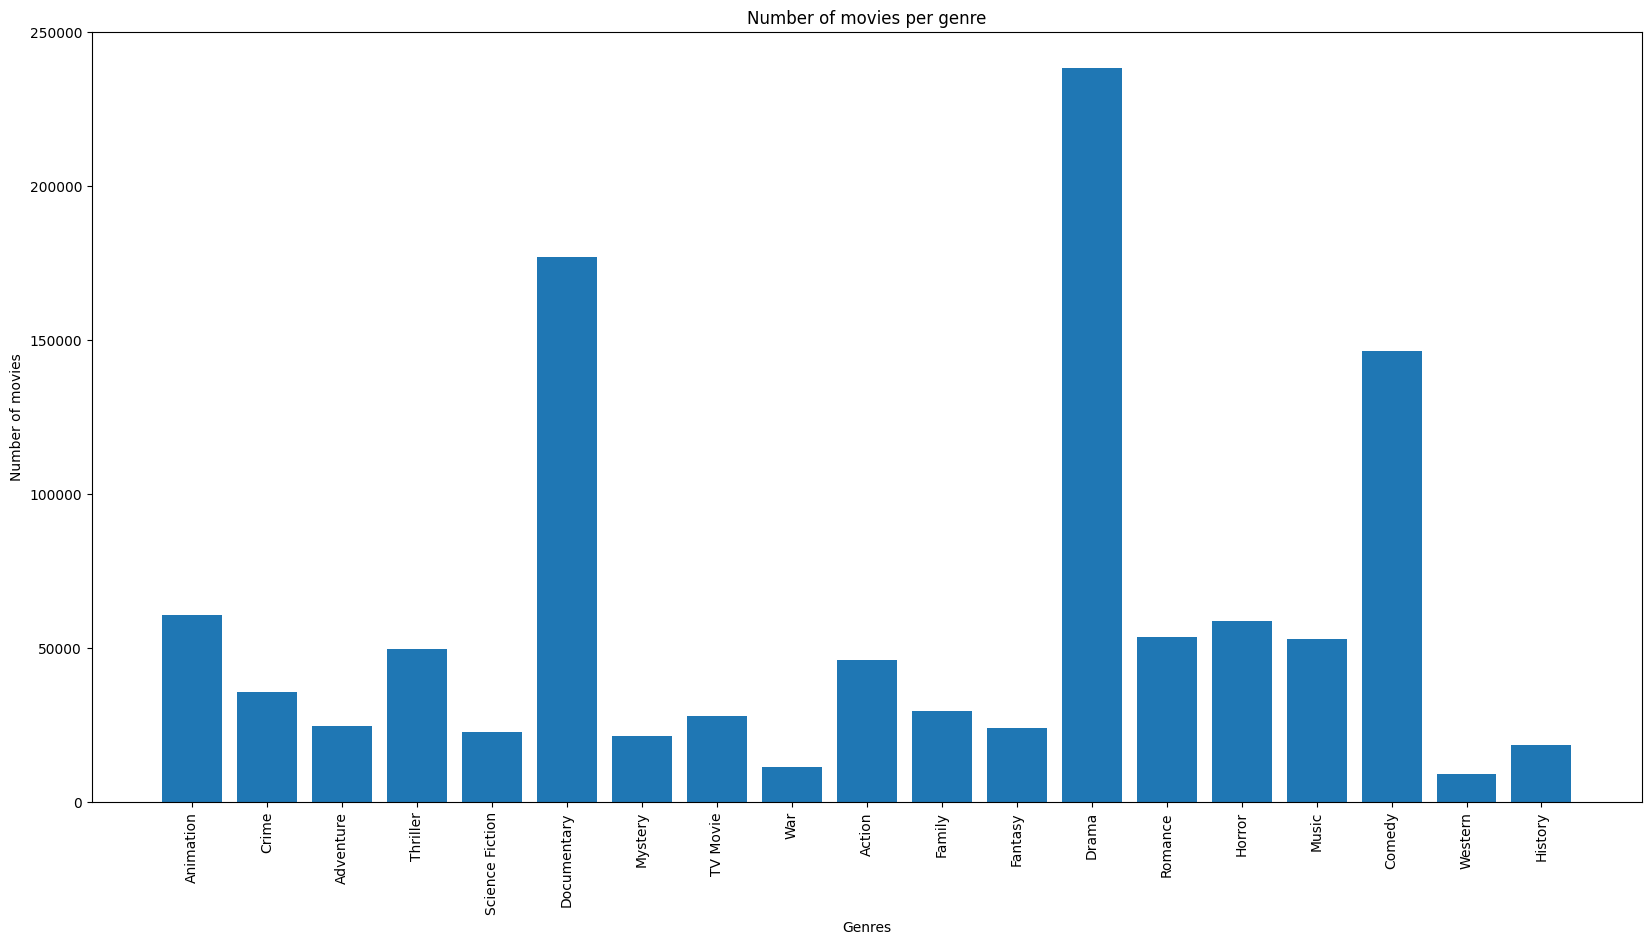

In [10]:
# THIS IS JUST TO VISUALIZE
# plot the histogram of genres
genres_count = {genre: 0 for genre in genres}
for genre_list in main_genres['genres']:
    if genre_list is not np.nan:
        for genre in genre_list:
            genre = genre.strip()
            genres_count[genre] += 1

# histogram
plt.figure(figsize=(20, 10))
plt.bar(genres_count.keys(), genres_count.values())
plt.xticks(rotation=90)
plt.xlabel('Genres')
plt.ylabel('Number of movies')
plt.title('Number of movies per genre')
plt.show()

### Cast and crew

In [11]:
# split the cast into a set of cast and remove spaces
main_genres['cast'] = main_genres['cast'].apply(lambda x: set(actor.strip() for actor in x.split(',')) if pd.notnull(x) else set())

In [12]:
main_genres['cast']

0          {Mikko Remes, Mikko Lyytikäinen, Olli Varja, E...
1          {Eskil Mansikka, Olli Varja, Malla Hukkanen, K...
2          {Quinn Hellerman, Quentin Tarantino, Lili Tayl...
3          {Raichle Watt, Michael Scranton, Stephen Dorff...
4                                                         {}
                                 ...                        
1009834                                                   {}
1009835                                                   {}
1009836                                                   {}
1009837    {Rouven Blessing, Iván Espeche, Lucila Gandolf...
1009838    {Kirk Baily, Jorge Lendeborg Jr., Jon Bailey, ...
Name: cast, Length: 1009839, dtype: object

In [13]:
# main_genres['cast']

# # split the cast into a list of actors
# main_genres['cast'] = main_genres['cast'].str.split(',')


# # check how many different actors are taking into account the content of the lists
# actors = set()
# for list in main_genres['cast']:
#     # if list is not NaN
#     if list is not np.nan:
#         for actor in list:
#             # remove the space at the beginning of the string if there is one
#             actor = actor.strip()
#             actors.add(actor)
# actors.remove('')
# print("There are ", len(actors), "different actors in the dataset")

In [13]:
# how many movies have no cast
nulls = main_genres['cast'].apply(lambda x: len(x) == 0).sum()
print("This percentage of movies have no cast:", nulls/len(main_genres)*100)

print(nulls)

This percentage of movies have no cast: 33.29124741666741
336188


create a column called "crew" with sets of director, director_of_photography, writers, music_composer and producers. Remove the columns of these ones

In [14]:
columns_to_merge = ['director', 'producers']

for column in columns_to_merge:
    main_genres[column] = main_genres[column].apply(lambda x: set(person.strip() for person in x.split(',')) if pd.notnull(x) else set())

main_genres['crew'] = main_genres.apply(lambda row: set.union(row['director'], row['producers']), axis=1)

# Drop the individual columns
main_genres.drop(columns=columns_to_merge, inplace=True)

# main_genres['crew']

In [15]:
main_genres['crew'][2]

{'Alexandre Rockwell',
 'Allison Anders',
 'Lawrence Bender',
 'Quentin Tarantino',
 'Robert Rodriguez'}

In [16]:
# how many movies have no crew
nulls = main_genres['crew'].apply(lambda x: len(x) == 0).sum()
print("This percentage of movies have no crew:", nulls/len(main_genres)*100)

This percentage of movies have no crew: 17.2818637426362


Production companies and countries

production_companies, production_countries 

In [17]:
# split the production_companies into a set and remove spaces
main_genres['production_companies'] = main_genres['production_companies'].apply(lambda x: set(company.strip() for company in x.split(',')) if pd.notnull(x) else set())

In [18]:
main_genres['production_companies'][3]
# remove the empty string from the set
main_genres['production_companies'] = main_genres['production_companies'].apply(lambda x: x - {''})

In [19]:
# check how many different production_companies are
companies = set()
for list in main_genres['production_companies']:
    # if list is not NaN
    if list is not np.nan:
        for company in list:
            # remove the space at the beginning of the string if there is one
            company = company.strip()
            companies.add(company)
print("There are ", len(companies), "different production companies in the dataset")
print("The companies are:", companies)

There are  170503 different production companies in the dataset
The companies are: {'Kino Pravda', 'Ripple Productions', 'G.H.', 'Jayraj Productions', 'willard pictures Inc.', 'Cine Crib', 'One Eye Production', 'Danza Stúdio', 'JDPL', 'Statens Kunstfond', 'NairaCine', 'La Realidad', 'Videoconciencia', 'Volcanic Films', 'Spectacle 5 Films', 'Brick Top Productions', 'Dada Films', 'Screen Glue Produktion', 'KRMA', 'Flair TV Productions', 'Schema Media', 'YOMIKO Advertising', 'Black Power Productions', 'Mohawk Princess Pictures', 'Henro Media', 'Green Art Group', 'Columbia TriStar Filmes do Brasil', 'Artemis Films', 'Forum Film Poland', 'Medyavizyon', 'Bandai Namco Group', 'Euro-France Films', 'VŠĮ Saulės Muzika', 'Домбайфильм', "Umesh mehra's", 'The Black Lotus', 'Studio Armin Linke', 'Beaconsfield Productions', 'Shaler Entertainment Pictures', 'Anirati Films', 'Canal Algérie', 'Hector Sanfer', 'Made By Limbo', 'Gouvernement Canadien', 'The VR Organization', 'Documentary Organization of C

In [20]:
# percentage of movies with no production companies
nulls = main_genres['production_companies'].apply(lambda x: len(x) == 0).sum()
print("This percentage of movies have no production companies:", nulls/len(main_genres)*100)

This percentage of movies have no production companies: 53.91235632610743


In [21]:
main_genres['production_countries'] = main_genres['production_countries'].apply(lambda x: set(country.strip() for country in x.split(',')) if pd.notnull(x) else set())

In [22]:
main_genres['production_countries']

0                           {Finland}
1                           {Finland}
2          {United States of America}
3          {United States of America}
4                           {Austria}
                      ...            
1009834                            {}
1009835                            {}
1009836                            {}
1009837                            {}
1009838                            {}
Name: production_countries, Length: 1009839, dtype: object

In [23]:
# how many different production countries are
countries = set()
for list in main_genres['production_countries']:
    # if list is not NaN
    if list is not np.nan:
        for country in list:
            # remove the space at the beginning of the string if there is one
            country = country.strip()
            countries.add(country)
print("There are ", len(countries), "different production countries in the dataset")
print("The countries are:", countries)

There are  249 different production countries in the dataset
The countries are: {'Montenegro', 'South Africa', 'Albania', 'Puerto Rico', 'Georgia', 'St. Pierre and Miquelon', 'Sao Tome and Principe', 'Iran', 'Portugal', 'Cayman Islands', 'Gabon', 'Belize', 'Northern Mariana Islands', 'Switzerland', 'Comoros', 'Iceland', 'Wallis and Futuna Islands', 'Saudi Arabia', 'Serbia and Montenegro', 'Oman', 'Liechtenstein', 'Greenland', 'Togo', 'Yemen', 'Fiji', 'Niue', 'Argentina', 'Kiribati', 'Romania', 'Gibraltar', 'Nauru', 'Seychelles', 'Timor-Leste', 'St. Vincent and the Grenadines', 'British Indian Ocean Territory', 'Ukraine', 'East Germany', 'Bulgaria', 'Czech Republic', 'Malawi', 'Mozambique', 'United Arab Emirates', 'Ghana', 'Zaire', 'Western Sahara', 'Ireland', 'Zambia', 'Guyana', 'Somalia', 'Kosovo', 'Guadaloupe', 'France', 'Malaysia', 'Paraguay', 'Mali', 'Cyprus', 'Jamaica', 'Russia', 'Myanmar', 'Mauritius', 'Benin', 'Aruba', 'Sweden', 'Egypt', 'Turks and Caicos Islands', 'Reunion', 'A

In [24]:
# percentage of movies with no production countries
nulls = main_genres['production_countries'].apply(lambda x: len(x) == 0).sum()
print("This percentage of movies have no production countries:", nulls/len(main_genres)*100)

This percentage of movies have no production countries: 39.518774774988884


### Sentiment classification + tokenization

In [25]:
df = main_genres

In [26]:
sentiment_min = df['sentiment'].min()
sentiment_max = df['sentiment'].max()
sentiment_mean = df['sentiment'].mean()
sentiment_std = df['sentiment'].std()
sentiment_mid = df['sentiment'].median()

print(f"Range of sentiment values: {sentiment_min} to {sentiment_max} with mean {sentiment_mean} and standard deviation {sentiment_std} and median {sentiment_mid}")

Range of sentiment values: 0.0 to 621.52 with mean 109.39746533773106 and standard deviation 83.97651422418457 and median 85.76


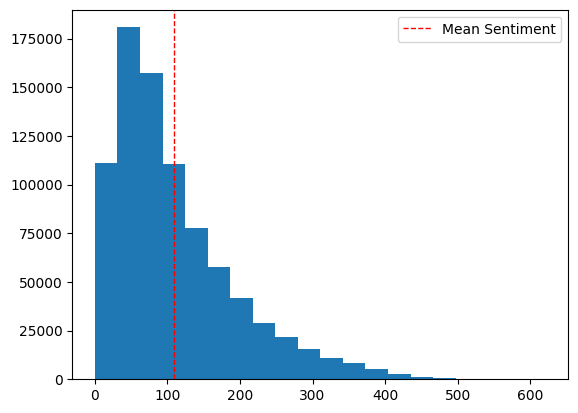

In [27]:
plt.hist(df['sentiment'], bins=20)
plt.axvline(df['sentiment'].mean(), color='r', linestyle='dashed', linewidth=1, label='Mean Sentiment')
plt.legend()
plt.show()

In [28]:
# Define the thresholds for sentiment ranges
low_threshold = sentiment_mean - sentiment_std
high_threshold = sentiment_mean + sentiment_std

# Function to categorize sentiment
def categorize_sentiment(value):
    if value < low_threshold:
        return 'low'
    elif value > high_threshold:
        return 'high'
    else:
        return 'medium'

# Assuming df is already defined and categorize_sentiment is a function
df.loc[:, 'sentiment_category'] = df['sentiment'].apply(categorize_sentiment)

# Display the updated dataframe
df[['title', 'sentiment', 'sentiment_category']].head()

,title,sentiment,sentiment_category
0,Ariel,68.24,medium
1,Shadows in Paradise,73.44,medium
2,Four Rooms,86.06,medium
3,Judgment Night,79.34,medium
4,Life in Loops (A Megacities RMX),382.44,high


In [29]:
main_genres = df

In [29]:
main_genres.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,budget,imdb_id,...,imdb_votes,poster_path,Netflix,Amazon,Hulu,Apple,HBO,sentiment,crew,sentiment_category
0,2,Ariel,7.1,330.0,Released,1988-10-21,0.0,73.0,0.0,tt0094675,...,8735.0,/ojDg0PGvs6R9xYFodRct2kdI6wC.jpg,0.0,1.0,1.0,0.0,0.0,68.24,{Aki Kaurismäki},medium
1,3,Shadows in Paradise,7.3,369.0,Released,1986-10-17,0.0,74.0,0.0,tt0092149,...,7484.0,/nj01hspawPof0mJmlgfjuLyJuRN.jpg,0.0,1.0,1.0,0.0,0.0,73.44,"{Aki Kaurismäki, Mika Kaurismäki}",medium
2,5,Four Rooms,5.8,2623.0,Released,1995-12-09,4257354.0,98.0,4000000.0,tt0113101,...,112484.0,/75aHn1NOYXh4M7L5shoeQ6NGykP.jpg,0.0,1.0,0.0,1.0,0.0,86.06,"{Allison Anders, Quentin Tarantino, Alexandre ...",medium
3,6,Judgment Night,6.5,331.0,Released,1993-10-15,12136938.0,109.0,21000000.0,tt0107286,...,19268.0,/3rvvpS9YPM5HB2f4HYiNiJVtdam.jpg,0.0,1.0,0.0,0.0,0.0,79.34,"{Lloyd Segan, Gene Levy, Stephen Hopkins, Mari...",medium
4,8,Life in Loops (A Megacities RMX),7.5,27.0,Released,2006-01-01,0.0,80.0,42000.0,tt0825671,...,284.0,/7ln81BRnPR2wqxuITZxEciCe1lc.jpg,0.0,0.0,0.0,0.0,0.0,382.44,"{Timo Novotny, Ulrich Gehmacher}",high


In [44]:
# # Perform one-hot encoding for the genres
# genres_dummies = main_genres['genres'].str.join('|').str.get_dummies()

# # Concatenate the one-hot encoded genres with the main_genres dataframe
# main_genres = pd.concat([main_genres, genres_dummies], axis=1)

# # Display the updated dataframe
# main_genres.head()


In [45]:
# genres_dummies.sum().sort_values(ascending=False).plot(kind='bar', figsize=(12, 6))
# plt.xlabel('Genres')
# plt.ylabel('Number of Movies')
# plt.title('Number of Movies per Genre')
# plt.show()
# genres_dummies.head()


In [30]:
dataset = main_genres

In [31]:
# clean movies with 3 or more interesting columns empty
columns = ['genres', 'cast', 'crew', 'production_companies', 'production_countries', 'sentiment_category']

initial_count = len(dataset)

# check each row if they have 3 or more columns from columns with empty sets
dataset = dataset[~(dataset[columns].apply(lambda x: sum(1 for i in x if len(i) == 0) >= 4, axis=1))]
final_count = len(dataset)

print("Number of movies removed: ", initial_count - final_count, "from a total of ", initial_count)
print("Percentage of movies removed: ", (initial_count - final_count) / initial_count * 100)

Number of movies removed:  188322 from a total of  1009839
Percentage of movies removed:  18.64871529025914


In [32]:
# remove movies if the 'status' is not 'Released'
initial_count = len(dataset)
dataset = dataset[dataset['status'] == 'Released']
final_count = len(dataset)

print("Number of movies removed: ", initial_count - final_count, "from a total of ", initial_count)
print("Percentage of movies removed: ", (initial_count - final_count) / initial_count * 100)

Number of movies removed:  15063 from a total of  821517
Percentage of movies removed:  1.8335591351122376


## Minhashing

In [39]:
import pandas as pd
import ast
from datasketch import MinHash, MinHashLSH

In [40]:
# prepare data for the minhashing, i just want to keep the columns: title, genre ones, sentiment, cast, crew, production_companies, production_countries and platform ones
data = dataset[['id', 'title', 'genres', 'sentiment_category', 'Netflix', 'Amazon', 'Hulu', 'Apple', 'HBO', 'crew', 'production_companies', 'production_countries', 'imdb_votes', 'imdb_rating']]

In [ ]:
# save the data
# data.to_csv('data/small_main_complete.csv', index=False)

In [21]:
# load the small dataset
data = pd.read_csv('data/small_main_complete.csv')

In [41]:
data.head()

,id,title,genres,sentiment_category,Netflix,Amazon,Hulu,Apple,HBO,crew,production_companies,production_countries,imdb_votes,imdb_rating
0,2,Ariel,"{Romance, Crime, Comedy, Drama}",medium,0.0,1.0,1.0,0.0,0.0,{Aki Kaurismäki},{Villealfa Filmproductions},{Finland},8735.0,7.4
1,3,Shadows in Paradise,"{Romance, Comedy, Drama}",medium,0.0,1.0,1.0,0.0,0.0,"{Mika Kaurismäki, Aki Kaurismäki}",{Villealfa Filmproductions},{Finland},7484.0,7.5
2,5,Four Rooms,{Comedy},medium,0.0,1.0,0.0,1.0,0.0,"{Robert Rodriguez, Alexandre Rockwell, Allison...","{Miramax, A Band Apart}",{United States of America},112484.0,6.7
3,6,Judgment Night,"{Crime, Action, Thriller}",medium,0.0,1.0,0.0,0.0,0.0,"{Marilyn Vance, Gene Levy, Stephen Hopkins, Ll...","{JVC, Largo Entertainment, Universal Pictures}",{United States of America},19268.0,6.6
4,8,Life in Loops (A Megacities RMX),{Documentary},high,0.0,0.0,0.0,0.0,0.0,"{Ulrich Gehmacher, Timo Novotny}",{inLoops},{Austria},284.0,8.2


Data preparation

In [42]:
# Number of permutations for MinHash
num_perm = 128

# Function to create a combined MinHash for a movie
def create_combined_minhash(movie, one_hot_features, non_one_hot_features):
    m = MinHash(num_perm=num_perm)
    
    # Add one-hot encoded features
    for feature in one_hot_features:
        if movie[feature] == 1:
            m.update(feature.encode('utf8'))
    
    # Add non-one-hot encoded features
    for feature in non_one_hot_features:
        for token in movie[feature]:
            m.update(token.encode('utf8'))
    
    return m

In [43]:
# list of one-hot encoded features
one_hot_features = ['Netflix', 'Amazon', 'Hulu', 'Apple', 'HBO']

# list of non-one-hot encoded features
non_one_hot_features = ['genres', 'sentiment_category', 'crew', 'production_companies', 'production_countries']

In [44]:
from tqdm import tqdm


# Create MinHashes for each movie with combined features and add to a new column in the DataFrame
minhashes = []
for idx, movie in tqdm(data.iterrows(), total=len(data), desc="Creating MinHashes"):
    minhash = create_combined_minhash(movie, one_hot_features, non_one_hot_features)
    minhashes.append(minhash)

Creating MinHashes: 100%|██████████| 806454/806454 [09:28<00:00, 1419.54it/s]


In [45]:
data['minhash'] = minhashes
data.head()

/var/folders/x1/r0lcq37s2gv_b_dbmtl4lrx40000gn/T/ipykernel_12251/3287800951.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['minhash'] = minhashes


,id,title,genres,sentiment_category,Netflix,Amazon,Hulu,Apple,HBO,crew,production_companies,production_countries,imdb_votes,imdb_rating,minhash
0,2,Ariel,"{Romance, Crime, Comedy, Drama}",medium,0.0,1.0,1.0,0.0,0.0,{Aki Kaurismäki},{Villealfa Filmproductions},{Finland},8735.0,7.4,<datasketch.minhash.MinHash object at 0x3d50d7...
1,3,Shadows in Paradise,"{Romance, Comedy, Drama}",medium,0.0,1.0,1.0,0.0,0.0,"{Mika Kaurismäki, Aki Kaurismäki}",{Villealfa Filmproductions},{Finland},7484.0,7.5,<datasketch.minhash.MinHash object at 0x369a0c...
2,5,Four Rooms,{Comedy},medium,0.0,1.0,0.0,1.0,0.0,"{Robert Rodriguez, Alexandre Rockwell, Allison...","{Miramax, A Band Apart}",{United States of America},112484.0,6.7,<datasketch.minhash.MinHash object at 0x3d50d3...
3,6,Judgment Night,"{Crime, Action, Thriller}",medium,0.0,1.0,0.0,0.0,0.0,"{Marilyn Vance, Gene Levy, Stephen Hopkins, Ll...","{JVC, Largo Entertainment, Universal Pictures}",{United States of America},19268.0,6.6,<datasketch.minhash.MinHash object at 0x3d50d7...
4,8,Life in Loops (A Megacities RMX),{Documentary},high,0.0,0.0,0.0,0.0,0.0,"{Ulrich Gehmacher, Timo Novotny}",{inLoops},{Austria},284.0,8.2,<datasketch.minhash.MinHash object at 0x3d50d7...


In [46]:
data.iloc[0]

id                                                                      2
title                                                               Ariel
genres                                    {Romance, Crime, Comedy, Drama}
sentiment_category                                                 medium
Netflix                                                               0.0
Amazon                                                                1.0
Hulu                                                                  1.0
Apple                                                                 0.0
HBO                                                                   0.0
crew                                                     {Aki Kaurismäki}
production_companies                          {Villealfa Filmproductions}
production_countries                                            {Finland}
imdb_votes                                                         8735.0
imdb_rating                           

In [47]:
# Angel's code for jaccard similarity
# Get user input for the movie title
movie_title = input("Enter the movie title: ")

# Find all movies with the specified title
matching_movies = data[data['title'] == movie_title]

if len(matching_movies) > 1:
    print(f"There are multiple movies with the title '{movie_title}'. Please choose one by its id:")
    for idx, row in matching_movies.iterrows():
        print(f"ID: {row['id']}, Crew: {row['crew']}")
    movie_id = int(input("Enter the movie id: "))
    movie_index = data[data['id'] == movie_id].index[0]
    print(f"Selected movie with id '{movie_id}' in position '{movie_index}'")
elif len(matching_movies) == 1:
    movie_index = data[data['title'] == movie_title].index[0]
    movie_id = data.iloc[movie_index]['id']
else:
    print(f"No movies found with the title '{movie_title}'")
    exit()

# Estimate Jaccard similarity with the specified movie
print(f"Estimated Jaccard Similarity with '{movie_title}':")
similarity_scores = []

for i in tqdm(range(len(minhashes)), desc="Calculating Similarities"):
    if i != movie_index:
        similarity = minhashes[movie_index].jaccard(minhashes[i])
        similarity_scores.append((data.iloc[i]['title'], similarity, minhashes[i], data.iloc[i]['id']))

# Sort the similarity scores in descending order
similarity_scores.sort(key=lambda x: x[1], reverse=True)

Estimated Jaccard Similarity with 'Star Wars':


Calculating Similarities: 100%|██████████| 806454/806454 [00:59<00:00, 13500.06it/s]


In [48]:
print(similarity_scores[:10])

[('The Empire Strikes Back', 0.8515625, <datasketch.minhash.MinHash object at 0x3e9a3d790>, np.int64(1891)), ('Star Wars: Episode I - The Phantom Menace', 0.828125, <datasketch.minhash.MinHash object at 0x3e9a3d850>, np.int64(1893)), ('Star Wars: Episode III - Revenge of the Sith', 0.828125, <datasketch.minhash.MinHash object at 0x3e9a3d910>, np.int64(1895)), ('Star Wars: Episode II - Attack of the Clones', 0.7578125, <datasketch.minhash.MinHash object at 0x3e9a3d8b0>, np.int64(1894)), ('Return of the Jedi', 0.7265625, <datasketch.minhash.MinHash object at 0x3e9a3d7f0>, np.int64(1892)), ('Indiana Jones Epic Stunt Spectacular', 0.625, <datasketch.minhash.MinHash object at 0x4a299ae80>, np.int64(1374190)), ('Obi-wan Kenobi  - The Patterson Cut', 0.59375, <datasketch.minhash.MinHash object at 0x49b7692b0>, np.int64(1325386)), ('Indiana Jones and the Temple of the Forbidden Eye', 0.5859375, <datasketch.minhash.MinHash object at 0x4a299ae20>, np.int64(1374187)), ('Traveler', 0.5703125, <dat

In [49]:
# Create a DataFrame to store the top 10 similar movies and their features
columns = ['title', 'crew', 'production_companies', 'production_countries', 'sentiment_category', 'Netflix', 'Amazon', 'Hulu', 'Apple', 'HBO']
top_10_df = pd.DataFrame(columns=columns)

top_10_list = []

# Add the movie_title data at the top
# movie_data = data[data['title'] == movie_title]
# top_10_list = [movie_data]

# Populate the DataFrame with the top 10 similar movies
for movie, score, minhash, id in similarity_scores[:10]:
    # print(f"Title: {movie}, Similarity: {score}", 'minhash:', minhash)
    movie_data = data[data['id'] == id]
    movie_data.head()
    top_10_list.append(movie_data)
    
top_10_list.append(data[data['id'] == movie_id])
top_10_df = pd.concat(top_10_list)

# Display the DataFrame
top_10_df

,id,title,genres,sentiment_category,Netflix,Amazon,Hulu,Apple,HBO,crew,production_companies,production_countries,imdb_votes,imdb_rating,minhash
1260,1891,The Empire Strikes Back,"{Science Fiction, Action, Adventure}",medium,0.0,0.0,0.0,0.0,0.0,"{George Lucas, Rick McCallum, Gary Kurtz, Irvi...",{Lucasfilm Ltd.},{United States of America},1407106.0,8.7,<datasketch.minhash.MinHash object at 0x3e9a3d...
1262,1893,Star Wars: Episode I - The Phantom Menace,"{Science Fiction, Action, Adventure}",medium,0.0,0.0,0.0,0.0,0.0,"{George Lucas, Rick McCallum}",{Lucasfilm Ltd.},{United States of America},874459.0,6.5,<datasketch.minhash.MinHash object at 0x3e9a3d...
1264,1895,Star Wars: Episode III - Revenge of the Sith,"{Science Fiction, Action, Adventure}",medium,0.0,0.0,0.0,0.0,0.0,"{George Lucas, Rick McCallum}",{Lucasfilm Ltd.},{United States of America},861687.0,7.6,<datasketch.minhash.MinHash object at 0x3e9a3d...
1263,1894,Star Wars: Episode II - Attack of the Clones,"{Science Fiction, Action, Adventure}",medium,0.0,0.0,0.0,0.0,0.0,"{George Lucas, Lorne Orleans, Rick McCallum}",{Lucasfilm Ltd.},{United States of America},773427.0,6.6,<datasketch.minhash.MinHash object at 0x3e9a3d...
1261,1892,Return of the Jedi,"{Science Fiction, Action, Adventure}",medium,0.0,0.0,0.0,0.0,0.0,"{Howard G. Kazanjian, George Lucas, Rick McCal...",{Lucasfilm Ltd.},{United States of America},1141266.0,8.3,<datasketch.minhash.MinHash object at 0x3e9a3d...
1005285,1374190,Indiana Jones Epic Stunt Spectacular,"{Action, Adventure}",medium,0.0,0.0,0.0,0.0,0.0,{George Lucas},"{Industrial Light & Magic, Lucasfilm Ltd., Wal...",{United States of America},NaN,NaN,<datasketch.minhash.MinHash object at 0x4a299a...
964252,1325386,Obi-wan Kenobi - The Patterson Cut,"{Science Fiction, Action}",medium,0.0,0.0,0.0,0.0,0.0,{},{Lucasfilm Ltd.},{United States of America},NaN,NaN,<datasketch.minhash.MinHash object at 0x49b769...
1005282,1374187,Indiana Jones and the Temple of the Forbidden Eye,"{Fantasy, Action, Adventure}",medium,0.0,0.0,0.0,0.0,0.0,{George Lucas},"{Industrial Light & Magic, Lucasfilm Ltd., Wal...",{United States of America},NaN,NaN,<datasketch.minhash.MinHash object at 0x4a299a...
362731,521323,Traveler,"{Science Fiction, Action, Adventure}",medium,0.0,0.0,0.0,0.0,0.0,{Simon Brown},{Simon Brown},{United States of America},153.0,5.6,<datasketch.minhash.MinHash object at 0x43b78b...
218504,340266,Mad Max: A Wasteland Story,"{Science Fiction, Action, Adventure}",medium,0.0,0.0,0.0,0.0,0.0,{Paul C. Miller},{},{United States of America},NaN,NaN,<datasketch.minhash.MinHash object at 0x4232b1...
